In [ ]:
# https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [4]:
# create random data and generate a 2d gaussian for test

# standardize the data

# compute the covariance matrix

# compute the eigenvectors and eigenvalues

# sort the eigenvectors by decreasing eigenvalues

# choose the k eigenvectors that correspond to the k largest eigenvalues where k is the dimensionality of the new feature space (k ≤ d)

# project the data onto the new feature subspace

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_90861/3170063011.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mu, sigma, 1000)


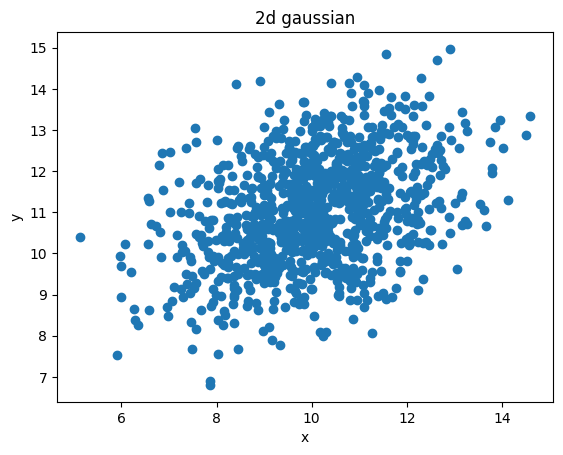

In [5]:
# 2d gaussian

mu = np.array([10, 11])
sigma = np.array([[1.3, 2.0], [2.0, 0.3]])

np.random.seed(0)
X = np.random.multivariate_normal(mu, sigma, 1000)

plt.scatter(X[:, 0], X[:, 1])
plt.title('2d gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Normalise matrices via. mean centring

Compute covariance matrix

Find Eigenvalues and eigenvectors of the covariance matrix

Rank top-k eigenvalues. These correspond to the new basis onto which the data has been projected.


Need to determine c = f(x) and g(c) $\approx$ x

In [129]:
# standardize the data
X_norm = (X - X.mean(axis=0))#/X.std(axis=0)

In [75]:
(X_cov := (X_norm.T @ X_norm) * 1/(len(X_norm) - 1))
# (X_cov := (np.dot(X_norm.T, X_norm)) * 1/(len(X_norm) - 1))

array([[2.17510751, 0.72264883],
       [0.72264883, 1.76155391]])

In [65]:
# Calculate the eigenvalues and eigenvecotrs of the covariance matrix
X_cov_lambda, X_cov_v = np.linalg.eig(X_cov) 

In [86]:
# Rank the PCA components in terms of the largest eigenvalues
(pca_components := X_cov_v[np.argsort(X_cov_lambda)])

array([[ 0.6020394 ,  0.79846638],
       [ 0.79846638, -0.6020394 ]])

In [68]:
(variance_ratios := X_cov_lambda / np.sum(X_cov_lambda))

array([0.69093594, 0.30906406])

In [69]:
# Figure out the logic for reconstruction here... 

In [89]:
pca_X = X_cov_v @ X_norm.T # projection onto the new basis

In [118]:
X_recon = np.linalg.inv(X_cov_v) @ pca_X

In [130]:
(np.linalg.inv(X_cov_v) @ pca_X).T + X.mean(axis=0) # reconstruction of X

array([[ 7.92451996,  8.8092922 ],
       [10.24397052,  7.99722518],
       [ 6.83439571,  9.92098679],
       ...,
       [ 9.80379586, 10.70751405],
       [ 8.24080863,  9.40069747],
       [10.61636652, 13.34937045]])

In [132]:
# X = (X_norm.T).T + X_mean

# X_recon = inverse(X_cov_v) * pca_X + X_mean

# X_recon = inverse(X_cov_v)*X_cov_v @ X_norm.T + X_mean

# X_recon = inverse(X_cov_v)*X_cov_v @ X_norm.T + X_mean
# difference comes when X_cov_v is compressed and some values are missing...

In [82]:
# Expanding the dimensions of the problem

In [83]:
np.random.seed(42)

dim = 20
mu = np.random.randint(low=1, high=10, size=dim)
sigma = np.random.rand(dim)

# Create a symmetric positive-semidefinite covariance matrix
sigma_diag = np.random.rand(dim)  # Create a random array for the diagonal
sigma = np.zeros((dim, dim))  # Initialize the covariance matrix

for i in range(dim):
    sigma[i] = np.roll(sigma_diag, i)  # Shift the diagonal array for each row

cov = np.dot(sigma.T, sigma)  # Ensure the matrix is positive-semidefinite

# Update X with the new covariance matrix
X = np.random.multivariate_normal(mu, cov, 1000)
print(X.shape)

(1000, 20)


(20, 4)
(4, 1000)
Original data shape: (1000, 20)
Reconstructed data shape: (1000, 20)
Reconstruction error with 4 components: 0.9490705620286851


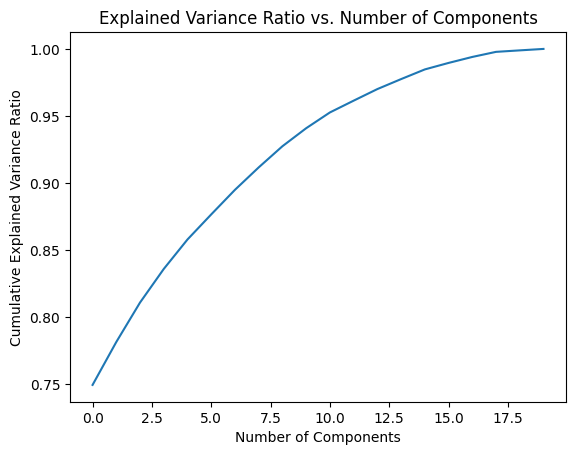

In [128]:
def pca(X, k=2):
    '''
    Perform PCA on the input matrix X and return components for reconstruction.
    
    Parameters:
    X (numpy.ndarray): The input data matrix with shape (n_samples, n_features).
    k (int): The number of principal components to retain.
    
    Returns:
    dict: A dictionary containing PCA results and components for reconstruction.
    '''

    X_norm = (X - X.mean(axis=0))  # Normalize the input data
    X_cov = (X_norm.T @ X_norm) * 1/(len(X_norm) - 1)  # Compute the covariance matrix
    x_cov_lambda, x_cov_v = np.linalg.eig(X_cov)  # Find the eigenvalues and eigenvectors of the covariance matrix
    
    # Sort eigenvectors by decreasing eigenvalues
    idx = x_cov_lambda.argsort()[::-1]
    x_cov_lambda = x_cov_lambda[idx]
    x_cov_v = x_cov_v[:, idx]
    
    # Select top k eigenvectors
    x_cov_v_reduced = x_cov_v[:, :k]
    
    variance_ratios = x_cov_lambda / np.sum(x_cov_lambda)
    ``
    pca_X = x_cov_v_reduced.T @ X_norm.T  # Project the data onto the new feature subspace
    
    return {
        'pca_components': x_cov_v,
        'variance_ratios': variance_ratios,
        'pca_X': pca_X,
        'X_mean': X.mean(axis=0),
        'x_cov_v_reduced': x_cov_v_reduced
    }

# Perform PCA
k = 4  # Number of components to retain
pca_result = pca(X, k=k)

# Reconstruct the data
X_reconstructed = (pca_result['x_cov_v_reduced'] @ pca_result['pca_X']).T + pca_result['X_mean']

# Print shapes to verify
print("Original data shape:", X.shape)
print("Reconstructed data shape:", X_reconstructed.shape)

# Calculate and print the reconstruction error
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction error with {k} components: {reconstruction_error}")

# Optionally, you can visualize the explained variance ratio
plt.plot(np.cumsum(pca_result['variance_ratios']))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()